In [1]:
#!/bin/python3
import matplotlib.pyplot as plt
import pandas as pd
import math
import numpy as np
import copy

In [2]:
plt.rcParams.update({
    "font.size": 16,          # default font size
    "axes.labelsize": 18,     # x and y labels
    "axes.titlesize": 18,     # title size
    "xtick.labelsize": 16,    # x tick labels
    "ytick.labelsize": 16,    # y tick labels
    "legend.fontsize": 16     # legend
})

In [3]:
#df = pd.read_csv(filename,sep='\t',names=["datatype","targettype","RunID","energy","d_reacted_carbon","all_carbon"])


def sort_eff_vals(filename,target_thickness):

    if (target_thickness == "thin"):
        targettype = "c_54"
    if (target_thickness == "medium"):
        targettype = "c_1086"
    if (target_thickness == "thick"):
        targettype = "c_2198"
    if (target_thickness == "empty"):
        targettype = "empty"
        
    df = pd.read_csv(filename,sep='\t',names=["datatype","targettype","RunID","energy","e_x1","e_x2","e_x3","e_x123","e_x1g","e_x2g","e_x3g","e_x123g","e_123_xyg"])
    #df = pd.read_csv(filename,sep='\t',names=["datatype","targettype","RunID","energy","e_x1","e_x2","e_x3","e_x123","e_x1g","e_x2g","e_x3g"]) # prelim version

    
    eff_list = []
    
    energy_vals = ["400","550","650","800"]
    for ene in energy_vals:
        d_red = df.loc[(df["targettype"] == targettype) & (df["energy"] == float(ene))]
        #print(d_red.shape)
        #print(type(d_red))
        #print(d_red.iloc[:, 4:])
        vals = d_red.iloc[:, 4:].values.tolist()
        eff_list.append(vals)

    return eff_list

In [4]:
#file = "comb_multiwire_eff.txt"
file = "comb_multiwire_eff_low_thr_mw2y.txt"

In [5]:
thin_vals = sort_eff_vals(file,"thin")
medium_vals = sort_eff_vals(file,"medium")
thick_vals = sort_eff_vals(file,"thick")
empty_vals = sort_eff_vals(file,"empty")

In [6]:
print((empty_vals))
npa = np.asarray(empty_vals)

[[], [], [], []]


In [7]:
print(npa)

[]


In [8]:
print(npa.shape)
squeezed_npa = np.squeeze(npa)

(4, 0)


In [9]:
squeezed_npa.shape

(4, 0)

In [10]:
npa.shape

(4, 0)

In [11]:
#file = "final_eff_mw123.txt"
file = "comb_mw123_check_400thr_mw3.txt" ##with threshold 400 at MW3

['c_1086' 'c_2198' 'c_54' 'empty']
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<clas

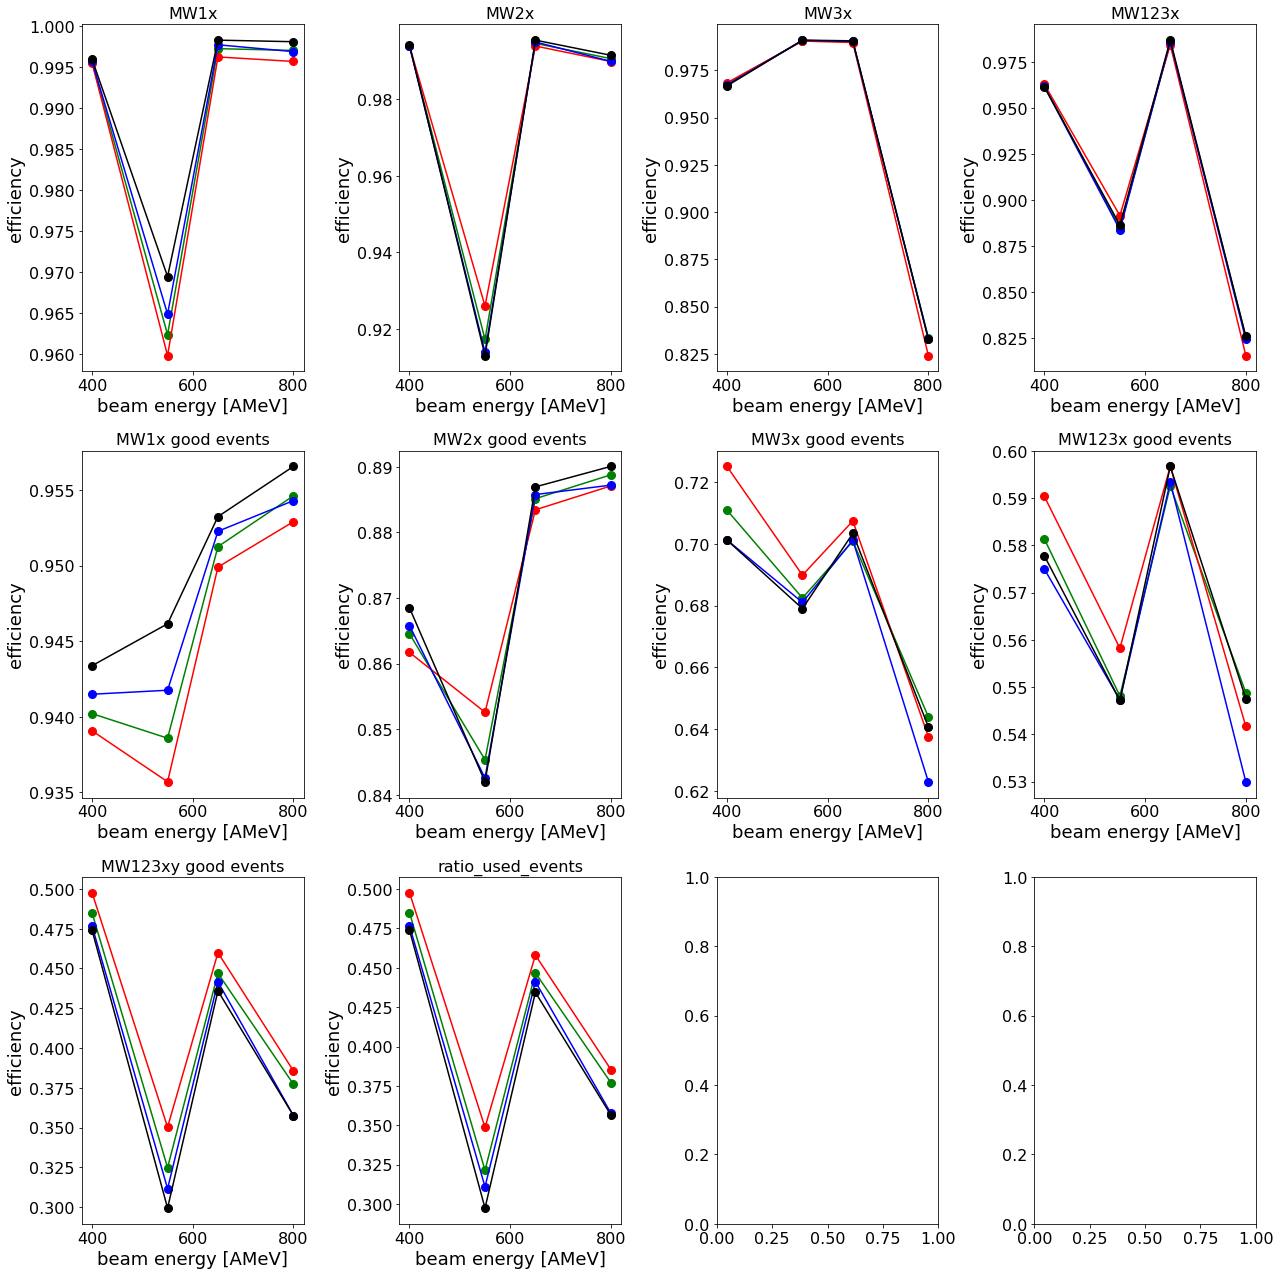

In [12]:
df = pd.read_csv(file,sep='\t',names=["datatype","targettype","RunID","energy","e_x1","e_x2","e_x3","e_x123","e_x1g","e_x2g","e_x3g","e_x123g","e_123_xyg","e_123used"])

fig,ax = plt.subplots(3,4,figsize=(18,18))
fig.tight_layout()
targets = df["targettype"].unique()
print(targets)
colors = ["green","red","blue","black"]
#colors = sns.color_palette("tab10", len(targets))  # or use your own mapping
color_map = dict(zip(targets, colors))
for i,(axi,t) in enumerate(zip(ax.flatten(),["MW1x","MW2x","MW3x","MW123x","MW1x good events","MW2x good events","MW3x good events","MW123x good events","MW123xy good events","ratio_used_events"])):

    for target in targets:
        subset = df[df["targettype"] == target]
        x_vals = subset["energy"].tolist()
        y_vals = subset.iloc[:,4+i].tolist()
        axi.plot(
            x_vals,
            y_vals,
            label=target,
            color=color_map[target],
            marker="o",
            markersize=8
        )
        axi.set_title(t,fontsize=16)
        axi.set_xlabel("beam energy [AMeV]")
        axi.set_ylabel("efficiency")
        #axi.grid()
        #axi.set_ylim(0,1)
        print(type(axi))
        
fig.tight_layout()

['c_1086' 'c_2198' 'c_54' 'empty']
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<clas

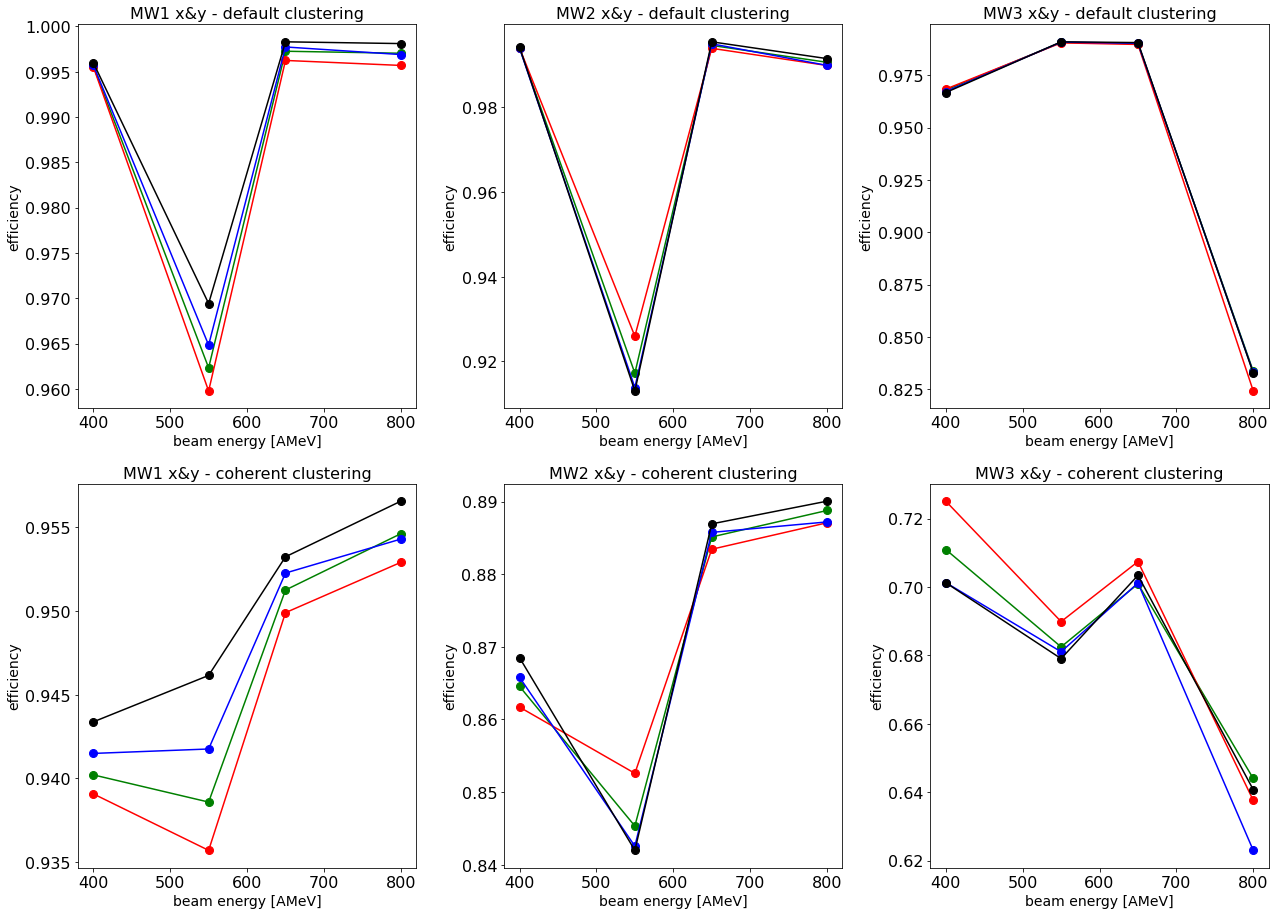

In [13]:
df = pd.read_csv(file,sep='\t',names=["datatype","targettype","RunID","energy","e_x1","e_x2","e_x3","e_x123","e_x1g","e_x2g","e_x3g","e_x123g","e_123_xyg","e_123used"])

fig,ax = plt.subplots(2,3,figsize=(18,13))
fig.tight_layout()
targets = df["targettype"].unique()
print(targets)
colors = ["green","red","blue","black"]
#colors = sns.color_palette("tab10", len(targets))  # or use your own mapping
color_map = dict(zip(targets, colors))
for i,(axi,t) in enumerate(zip(ax.flatten(),["MW1 x&y - default clustering","MW2 x&y - default clustering","MW3 x&y - default clustering","MW1 x&y - coherent clustering","MW2 x&y - coherent clustering","MW3 x&y - coherent clustering"])):

    for target in targets:

        subset = df[df["targettype"] == target]
        x_vals = subset["energy"].tolist()

        
        if (i < 3):
            y_vals = subset.iloc[:,4+i].tolist()
        else:
            y_vals = subset.iloc[:,5+i].tolist()
        axi.plot(
            x_vals,
            y_vals,
            label=target,
            color=color_map[target],
            marker="o",
            linestyle="-",
            markersize=8
        )
        axi.set_title(t,fontsize=16)
        axi.set_xlabel("beam energy [AMeV]",fontsize=14)
        axi.set_ylabel("efficiency",fontsize=14)
        #axi.grid()
        #axi.set_ylim(0,1)
        print(type(axi))
        
fig.tight_layout()
plt.savefig("eff_plot_mwpcs.png",dpi=300,bbox_inches='tight')

['c_1086' 'c_2198' 'c_54' 'empty']
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>
<class 'matplotlib.axes._subplots.AxesSubplot'>


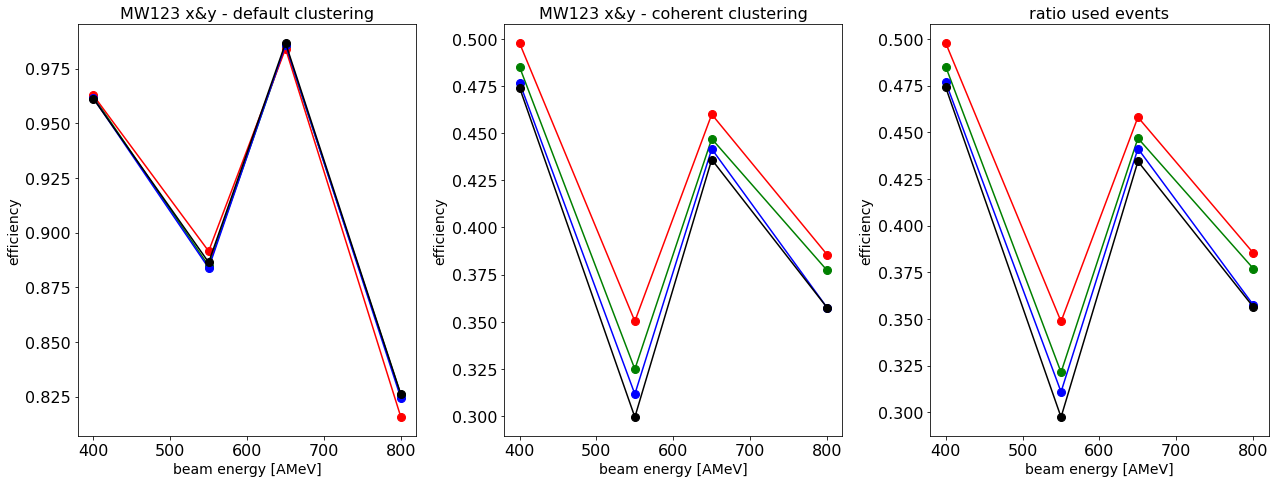

In [15]:
df = pd.read_csv(file,sep='\t',names=["datatype","targettype","RunID","energy","e_x1","e_x2","e_x3","e_x123","e_x1g","e_x2g","e_x3g","e_x123g","e_123_xyg","e_123used"])

fig,ax = plt.subplots(1,3,figsize=(18,7))
fig.tight_layout()
targets = df["targettype"].unique()
print(targets)
colors = ["green","red","blue","black"]
#colors = sns.color_palette("tab10", len(targets))  # or use your own mapping
color_map = dict(zip(targets, colors))
list_of_data = [7,12,13]
for i,(axi,t) in enumerate(zip(ax.flatten(),["MW123 x&y - default clustering","MW123 x&y - coherent clustering","ratio used events"])):

    for target in targets:
        subset = df[df["targettype"] == target]
        x_vals = subset["energy"].tolist()
        y_vals = subset.iloc[:,list_of_data[i]].tolist()
        
        axi.plot(
            x_vals,
            y_vals,
            label=target,
            color=color_map[target],
            marker="o",
            markersize=8
        )
        axi.set_title(t,fontsize=16)
        axi.set_xlabel("beam energy [AMeV]",fontsize=14)
        axi.set_ylabel("efficiency",fontsize=14)
        if (i ==3):
            axi.set_ylabel("ratio used events",fontsize=14)
        #axi.grid()
        #axi.set_ylim(0,1)
        print(type(axi))
        
fig.tight_layout()
plt.savefig("combined_eff_plot_mwpcs.png",dpi=300,bbox_inches='tight')